In [123]:
# Imports.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [124]:
# Initialize.

pd.set_option('display.max_columns', None)
df = pd.read_csv('GfSD\SDGData.csv', sep=',',decimal='.', skiprows=0)
df = df.set_index('Indicator Name')
df = df.loc['Share of youth not in education, employment or training, total (% of youth population)']

years = [str(i) for i in range(2000,2021)]
country_names = {
    'MERCOSUL' : ['Brazil','Argentina','Paraguay','Uruguay','Venezuela, RB','Chile','Peru','Colombia','Ecuador','Guyana','Suriname'] ,
    'UE' : ['Austria', 'Belgium', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden'],
}

In [125]:
# Tratando e dividindo a DataBase.

df = df.set_index('Country Name')

# Não aplica as mudanças com um For, nem tenta. 

df_mercosul = df.loc[country_names['MERCOSUL']]

df_eu = df.loc[country_names['UE']]

df

,Country Code,Indicator Code,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 35
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Arab World,ARB,SL.UEM.NEET.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Caribbean small states,CSS,SL.UEM.NEET.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Central Europe and the Baltics,CEB,SL.UEM.NEET.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.536225,15.471775,13.226586,11.447674,10.266970,12.056375,13.035390,13.434748,13.646324,13.994003,13.472554,12.952542,12.314896,11.116983,10.316690,10.012076,10.540033,NaN
Early-demographic dividend,EAR,SL.UEM.NEET.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.292206,NaN,NaN,NaN,NaN,27.430248,NaN,25.973420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
East Asia & Pacific,EAS,SL.UEM.NEET.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virgin Islands (U.S.),VIR,SL.UEM.NEET.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
West Bank and Gaza,PSE,SL.UEM.NEET.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.029999,36.880001,36.110001,32.200001,30.840000,29.760000,29.139999,29.110001,28.799999,28.219999,29.270000,27.450001,30.010000,31.440001,32.240002,32.240002,32.430000,33.240002,33.450001,33.410000,34.459999,NaN
"Yemen, Rep.",YEM,SL.UEM.NEET.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.770000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


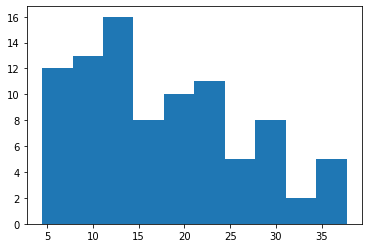

In [126]:
# Achando critério.

mean = df['2020'].mean()
std = df['2020'].std()

z = (df['2020'] - mean)/std
w = 2
filtro = z < w
x = df['2020'][filtro]
filtro = z > -w
x = x[filtro]

plt.figure()
plt.hist(x)
plt.show()

criterio_avancado_mundial = z < z.mean()
criterio_atrasado_mundial = z >= z.mean()
criterio_atrasado_mundial.value_counts()

P_avacado_mundial = criterio_avancado_mundial.value_counts()[True]/criterio_avancado_mundial.value_counts().sum()


 - De acordo com os resultados obtidos, constatamos que para o ano de 2020, não há grandes disparidades na amostra que estamos analisando, permitindo que adotemos a média como critério de classificação entre países 'avançados' e 'atrasados'.
 
 - Escolhemos o ano de 2020 por ser o mais próximo do ano atual (2022)

In [127]:
# Trabalhar dados (EU)

mean = df_eu['2020'].mean()
std = df_eu['2020'].std()

z = (df_eu['2020'] - mean)/std
w = 2
filtro = z < w
x = df_eu['2020'][filtro]
filtro = z > -w
x = x[filtro]

# plt.figure()
# plt.hist(x)
# plt.show()

criterio_avancado_eu = z < z.mean()
criterio_atrasado_eu = z >= z.mean()

print(x.mean())
criterio_avancado_eu

9.652000026702883


Country Name
Austria             True
Belgium             True
Croatia            False
Cyprus             False
Czech Republic      True
Denmark             True
Estonia             True
Finland             True
France             False
Germany             True
Greece             False
Hungary            False
Ireland            False
Italy              False
Latvia              True
Lithuania          False
Luxembourg          True
Malta               True
Netherlands         True
Poland              True
Portugal            True
Romania            False
Slovak Republic    False
Slovenia            True
Spain              False
Sweden              True
Name: 2020, dtype: bool

In [128]:
# Trabalhar dados (MERCOSUL)

mean = df_mercosul['2020'].mean()
std = df_mercosul['2020'].std()

z = (df_mercosul['2020'] - mean)/std
w = 2
filtro = z < w
x = df_mercosul['2020'][filtro]
filtro = z > -w
x = x[filtro]

# plt.figure()
# plt.hist(x)
# plt.show()

criterio_avancado_mercosul = z < z.mean()
criterio_atrasado_mercosul = z >= z.mean()

print(x.mean())
criterio_avancado_mercosul


23.764999866485624


Country Name
Brazil           False
Argentina         True
Paraguay         False
Uruguay          False
Venezuela, RB    False
Chile             True
Peru             False
Colombia         False
Ecuador          False
Guyana           False
Suriname         False
Name: 2020, dtype: bool

In [129]:
P_avaçado_eu = criterio_avancado_eu.value_counts()[True]/criterio_avancado_eu.value_counts().sum()
P_avaçado_mercosul = criterio_avancado_mercosul.value_counts()[True]/criterio_avancado_mercosul.value_counts().sum()

# criterio_avancado_eu.value_counts()
# criterio_avancado_mercosul.value_counts()


In [136]:
P_bloco_eu = len(country_names['UE'])/criterio_avancado_mundial.value_counts().sum()

(P_avaçado_eu*P_avacado_mundial)/P_bloco_eu # IDK waht the hell happened

1.1316568047337279

1. Motivos de criação:

- Mercosul: 1991, com o objetivo de aumentar a oferta de emprego, intensificar relações econômicas e melhorar produtividade. Inicialmente faziam parte somente Argentina, Brasil, Paraguai e Uruguai.
A ideia era fazer uma TEC (Tarifa Externa Comum), para assim criar um imposto único a todos os produtos importados, e portanto uma união aduaneira.

- União Européia: 1993. Inicialmente faziam parte somente Alemanha, Bélgica, Dinamarca, Espanha, França, Grécia, Irlanda, Itália, Luxemburgo, Países Baixos, Portugal, Reino Unido e Suécia.
Se uniram com o objetivo de promover a paz, a prosperidade e a liberdade, e também para criar um mercado comum interno, com livre circulação de mercadorias, serviços, capitais e pessoas, além de promover coesão geral do território europeu, e ainda uma união monetária para facilitar relações comerciais.

In [131]:
#2. Determinar um critério pra classificar 
# entre avançado e atrasado
# e fazer essa classificação para cada país

# Indicador: Share of youth not in education, employment or training, total (% of youth population)



In [132]:
#3. Usando os dados do 2,
#fazer a prob de ser avançado em cada bloco (fácil)

In [133]:
#4. Não entendi esse???
# Acho que é a prob de ser de cada bloco se for avançado???

In [134]:
#5. Esse aqui tem que ver os resultados do 2 e 3
# Na real tbm não entendi o que ele quer dizer com sistema aqui

In [135]:
#6. Responder se o nosso indicador é um bom preditor para
# o bloco econômico	ou não, e justificar
# basicamente escrever uma conclusão bonitinha